# Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] #petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Trained trees can be visualized using the `export_graphviz()` method

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file='./images/iris_tree.dot',
        feature_names=iris.feature_names[2:],
        class_names = iris.target_names,
        rounded = True,
        filled = True
)

! dot -Tpng ./images/iris_tree.dot -o ./images/iris_tree.png


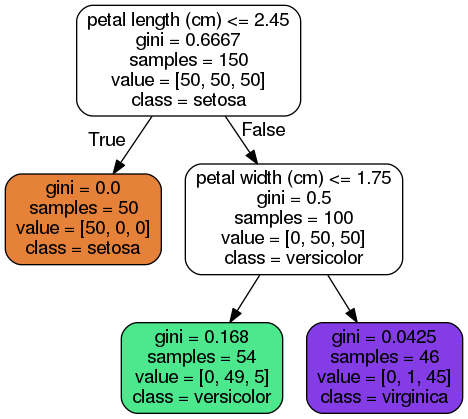


# Making Predictions

The idea behind a tree used for classification is 'asking questions' in each tree node. Each node divides the data into two classes according to a parameter and a threshold set for each node. For example, in the tree trained above the first criteria used for the division is the petal length of 2.45 cm. If the instance has a petal length less than or equal to 2.45 cm, it is sent to the left. Otherwise, the instance is sent to the right. An advantage of Decision Trees is that they require little data preparation. For example, data scaling or centering is not needed for Decision Trees.

Another advantage of decision tree is that their process of classification is easy to interpret. This is why this model is called a white box model. On the other hand, models where it is difficult to interpret the reasons that lead to a decision, such as Random Forests and Neural Networks, are called black box models. 

In the visualization, the `sample` attribute shows how many training instances are being used in that node and the `value` attribute shows how many instances of each class are in the node. The `gini` attribute measures the impurity of a node: the node is pure (`gini = 0`) when the node only has instances of only one class. The gini index in each node is given by the equation

$G = 1 - \sum_{k=1}^{n}p_{k}^{2}$

where $p_{k}$ is the ration of the class $k$ among the total instances in the node. For example, for the left node in the second level the gini index would be

$G = 1 - (\frac{0}{54})^{2} - (\frac{49}{54})^{2} - (\frac{5}{54})^{2}$

# Estimating Class Probabilities

Decision Trees can estimate the probability that an instace belongs to a certain class. This probability is calculated using the ratios of each class in the node in which the instance would belong. For example, a flower with petals 5 cm long and 1.5 cm wide would have 0% chance of being Setosa, 90.7% Versicolor, and 9.3% Virginica.


In [3]:
tree_clf.predict_proba([[5, 1.5]])

array([[ 0.        ,  0.90740741,  0.09259259]])

# The CART Training Algorithm

The algorithm used in Scikit-Learn to train the Decision Trees is called *Classification And Regression Tree* (CART). The idea of this algorithm was described earlier: split the data into two sets according to a feature $k$ and a value $t_{k}$. The values for $k$ and $t_{k}$ are chosen so the pair $(k, t_{k})$ is that one that results in the most purest subsets. With that in mind, the cost function of the CART algorithm is

$J(k, t_{k}) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$

where $G$ is the gini index and $m$ the number of instances in each subset. 

This procedure is repeated until the tree reaches its maximum depth or when the algorithm cannot find a split that reduces impurity. Other conditions can be set in the hyperparameters to control the stopping conditions.

The problem of the CART algorithm is that it is a greedy algorithm. It searches for the optimal split at each level but does not guarantee that the splits in the upper levels will lead to the lowest possible impurity in the bottom levels. This is why the solution found using Decision Trees is a good solution but not necessary the best solution. 

Other problem encountered when using the CART algorithm is that it requires $O(\exp(m))$ time to reach a solution, because it is solvig an NP-Complete problem. This exponential dependence makes the time for large datasets too large for practical purposes.

# Computational Complexity

Making predcitions once a Decision Tree is trained requires going through $O(\log_{2}(m)) = O(\log(m)/\log(2))$ nodes. The overall prediction is of the same order since each node only has to check one value, no matter the number of features. This order shows that predictions are very fast, even for large training sets. 

However, training the algorithm using all features has a computational complexity of $O(n\times m \log(m))$ because the algorithm has to compare all features in each node. This computational complexity makes the algorithm slow for large training sets.

# Gini Impurity vs Entropy

The entropy impurity measure can be used instead of the Gini index by setting `criterion='entropy`. Although entropy has different meanings depending on the context, entropy in machine learning is a measure of the impurity of a set. Entropy is zero when the set contains instances from only one class. The mathematical definition of entropy for machine learning is given by the equation

$H = - \sum_{k=1}^{n} p_{k}\log(p_{k})$.

As in the Gini measure case, $p_{k}$ is the probability of an instance of being class $k$.

In practice, the results achieved with both criteria are similar. However, using Gini is slightly faster than using entropy. Another difference is that Gini tends to isolate the most frequent class while entropy tends to create more balanced trees. 

# Regularization Hyperparameters

The Decision Tree is what is called a *nonparametric model*, because the number of parameters is not determined before training. The Decision Tree makes few assumptions about the training data. Instead, this model adapts to the training data leading to fit the training data closely (sometimes leading to overfitting).

To avoid overfitting, the freedom of the Decision Tree has to be restricted during training. One common way to restrict the freedom of, or regularize, the Decision Tree is by setting a maximum depth of the tree. This hyperparameter is controlled by the `mak_depth` hyperparameter in Scikit-Learn. 

Other options to regularize a Decision Tree are 
+ `min_samples_split`: Minimum number of samples a node must have before splitting
+ `min_samples_leaf`: Mimnum number of samples a leaf node must have before it can split
+ `min_weight_fraction_leaf`: Is the same as `min_samples_leaf` but expressed as a fraction of total weighted instances. 
+ `max_leaf_nodes`: Maximum number of leaf nodes
+ `max_features`: Maximum number of features that are evaluated for splitting at each node.

The rule of thumb for regularization is that increasing `min_` parameters and reducing `max_` parameters will regularize more the model. 

Some algorithms first train the Decision Tree without restrictions and then remove unnecessary nodes. A node is considered unnecessary if the purity improvement is not statistically significant. The statical significance is tested, using test such as the $\chi^{2}$, to determine whether the improvement is due to chance. If after the test the node is considered unnecessary, the node is deleted and the procedure continues until only the relevant nodes are left. 

# Regression

Decision trees are also capable to perform regression tasks.

In [6]:
from sklearn.tree import DecisionTreeRegressor
import numpy as  np

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(m, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

export_graphviz(
        tree_reg,
        out_file='./images/iris_tree_reg.dot',
        feature_names='x1',
        rounded = True,
        filled = True
)

! dot -Tpng ./images/iris_tree_reg.dot -o ./images/iris_tree_reg.png


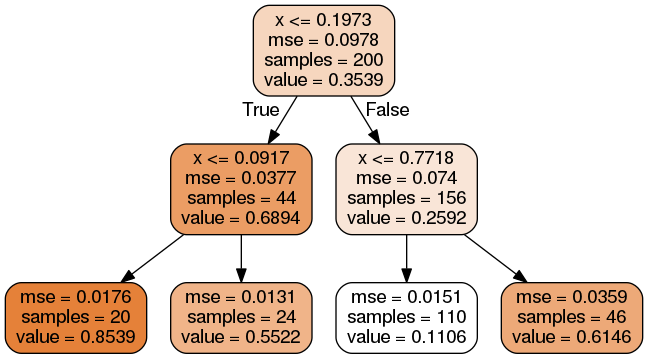

Although the trees from classification and regression look similar, the main difference is that in each node a value instead of a class is predicted. The idea is to divide the feature space into regions that have an average value: the value in each node. The objective of the Decision Tree Regression is to make those average values as close as possible to the ones of the instances in each region. 

The idea of the CART algorithm remains the same. However, the cost function instead of trying to reduce the Gini index, it tries to minimize the MSE.

$J(k, t_{k}) = \frac{m_{\text{left}}}{m}\text{MSE}_{\text{left}} + \frac{m_{\text{right}}}{m}\text{MSE}_{\text{right}}$

$\text{MSE}_{\text{node}} = \sum_{i} \left( \hat{y}_{\text{node}} - y^{(i)}\right)$ for every instance $i$ inside the node region

$\hat{y}_{\text{node}} = \frac{1}{m_{\text{node}}} \sum_{i} y^{(i)}$

Just like in classification, Decision Trees tend to overfit the regression when they are not regularized


# Instability

Although Decision Trees are easy to understand, easy to use, and versatile, they have some limitations. The first issue is that Decision Trees tend to create orthogonal decision boundaries, ie the boundaries are perpendicular to an axis. This tendency makes Decision Trees sensible to rotations. For example, a training set can have a linear boundary to separate two classes. However, if the axis are rotated 45°, making the optimal boundary a diagonal line, the Decision Tree creates an unnecessary complicated boundary.

The last case is just an example to a general problem with Decision Trees: they are too sensitive to small variations in the training data. That is, if a single instance is removed from the dataset, the algorithm can create completely different boundaries. Furthermore, since the algorithm used in Scikit-Learn is stochastic, the model resulting from training can be very different each time (unless the `random_state` parameter is set). This variation for small changes make Decision Trees unstable. This instability can be fixed using a collection or trees, or Random Forest.